<a href="https://colab.research.google.com/github/mebasiri/Multimodal-Persian-SA/blob/main/Multimodal_Persian_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sn
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.layers import  LSTM, Embedding, Dropout, Activation, Conv1D, GRU, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, TimeDistributed
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D,SpatialDropout1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import classification_report
import pandas as pd
from pandas import ExcelWriter
from keras.preprocessing.sequence import pad_sequences
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers import Conv1D
import seaborn as sn
from keras.layers import add
from keras.layers import  Activation, Add, Dropout
 
from keras import optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
import PIL
from numpy import *
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.layers import Concatenate
 
#from keras.utils import plot_model
from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#from tensorflow.python.framework.ops import disable_eager_execution
#disable_eager_execution()
 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Preprocess text

Open

In [ ]:
File = pd.read_excel ('/content/drive/MyDrive/Dataset 2.0/Caption 2.0.xlsx', sheet_name='Sheet1')
data = pd.DataFrame(File, columns= ['caption', 'lable'])

caption = data['caption'].values.tolist()
print(caption)
label = data['lable'].values.tolist()
stopwordFile = pd.read_excel('/content/drive/My Drive/StopWord.xlsx', sheet_name='Sheet1')   
stopword = pd.DataFrame(stopwordFile, columns= ['a'])
stopword_list = stopword['a'].values.tolist()

['سلام سلام عزیزای دلم... امیدوارم احوالتون عالی باشه.. روز عشق رو به همتون تبریک میگم و امیدوارم که  عشق تو زندگی همتون جاری باشه.اینم قلب سوپرایز من که برای دختر گلم درست کردم و خیلی خوشش اومد و سوپرایز شد. برای درست کردن این قلب، من از قالب قلب سیلیکون استفاده کردم، که توی عکسِ اسلایدهای بعدی مشخصه... 280 گرم شکلات تخته ای شیری رو بن ماری کردم روی بخار آب و و بهش رنگ پودری قرمز زدم. میشه شکلات رو هم رنگی بخرید که در رنگهای مختلف موجوده و نیازی هم نیست که بخواین رنگش کنید، ولی من دیگه شکلات شیری تو خونه داشتم و همونو استفاده کردم، قالب رو کمی چرب کردم و شکلات ذوب شده رو داخلش چرخوندم تا به همه جای قالب برسه، حتی دیوارش.  به هیچ وجه نباید یک قطره آب داخل شکلات بره یا حتی بخار آب، چون سفت و خرابش میکنه. و شکلات که به همه جای قالب رسید، اضافش رو خالی کردم و قالب رو ده دقیقه الی یک ربع گذاشتم یخچال و بعد به همین صورت کارم رو تکرار کردم، این دفعه با قلم موی  سیلیکون شکلات به همه جای قالب زدم و مجددا گذاشتم یخچال. من این کار رو دو بار انجام دادم چون شکلاتم کم بود، ولی اگر سه بار شکلات به ق

Split data by index

In [ ]:
data_index = [] # a help list for split & handle data (Image & Text)
for i in range(len(label)):
  data_index.append(i)
print("Indexes of Data = ", data_index)
 
X_train_index, X_test_index, Y_train, Y_test = train_test_split(data_index, label,
                                                                            test_size = 0.1,  stratify= label, 
                                                                            random_state = 2018)
X_train_index, X_val_index, Y_train, Y_val = train_test_split(X_train_index, Y_train,
                                                              test_size = 0.2,  stratify= Y_train, 
                                                              random_state = 2018)
 
print("Indexes of X_test = ", X_test_index)
print("Indexes of X_train = ", X_train_index)
print("Indexes of X_val = ", X_val_index)
print("# of Data = ", len(label))
print("# of test = ", len(Y_test))
print("# of train = ", len(Y_train))
print("# of val = ", len(Y_val))
 
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)

Indexes of Data =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

Text

In [ ]:
dictionary = []
list = []
'''
# new dataset
for i in Remove_stword:
    i = i.replace('[', '')
    i = i.replace("'", '')
    i = i.replace(',', '')
    i = i.replace(']', '')
    temp = i.split()
    for j in temp:      #create dictionary
        if j not in dictionary:
            dictionary.append(j)
    ind = []
    for j in temp:
        ind.append(dictionary.index(j))
    list.append(ind)
print(dictionary)
print(list)
'''
# old dataset
for i in caption:
    for stopword in stopword_list:
      i = i.replace(str(stopword), '')
    i = i.replace('.', '')  #erase .
    i = i.replace('"', '')  #erase "
    i = i.replace(':', '')  #erase :
    i = i.replace('(', '')  #erase (
    i = i.replace(')', '')  #erase )
    i = i.replace(',', '')  #erase ,
    i = i.replace('،', '')  #erase ،
    i = i.replace('!', '')  #erase !
    i = i.replace('-', '')  #erase -
    i = i.replace('_', '')  #erase _
    i = i.replace('؟', '')  #erase ؟
    i = i.replace('?', '')  #erase ?
    i = i.replace('\u200c', '')  #erase \u200c
    i = i.replace('\u200f', '')  #erase \u200f
    i = i.replace('؛', '')  #erase ؛
    #i = i.replace('\n', '')  #erase \n

    temp = i.split()
    #print(temp[0].tolist())
    for j in temp:      #create dictionary
        if j not in dictionary:
            dictionary.append(j)
    #print(dictionary[0].tolist())
    ind = []
    for j in temp:
        ind.append(dictionary.index(j))
    list.append(ind)
    
print(list[0]) 
d10 = 0
d10_20 = 0
d20_30 = 0
d30_40 = 0
d40_50 = 0
d50 = 0
sum_len = 0
for i in list:
  temp = len(i)
  sum_len += temp
  if temp<=10:
    d10 += 1
  elif temp>10 and temp<=20:
    d10_20 += 1
  elif temp>20 and temp<=30:
    d20_30 += 1
  elif temp>30 and temp<=40:
    d30_40 += 1
  elif temp>40 and temp<=50:
    d40_50 += 1
  elif temp>50:
    d50 += 1
print ("0-10: ",d10,"\n10-20: ",d10_20,"\n20-30: ",d20_30,"\n30-40: ",d30_40,"\n40-50: ",d40_50,"\n50+: ",d50)
avg = sum_len/len(list)
print ("avg: ",avg)

Caption = pad_sequences(list, maxlen=20, padding='post')
print(len(dictionary))
print(Caption)
Caption = Caption.tolist()
print(Caption)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 6, 10, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 14, 17, 21, 13, 22, 13, 23, 7, 18, 11, 24, 25, 11, 26, 9, 27, 28, 29, 30, 11, 18, 31, 32, 33, 34, 35, 36, 37, 5, 27, 38, 39, 40, 41, 42, 43, 31, 44, 45, 27, 29, 31, 30, 7, 18, 22, 18, 27, 46, 7, 47, 48, 11, 22, 49, 50, 51, 30, 52, 32, 53, 27, 7, 31, 32, 54, 55, 56, 27, 11, 22, 57, 58, 59, 18, 22, 60, 61, 62, 63, 64, 65, 66, 56, 8, 18, 67, 68, 56, 23, 27, 11, 22, 37, 69, 64, 65, 70, 56, 71, 72, 56, 70, 27, 22, 73, 74, 5, 56, 31, 70, 75, 33, 76, 77, 78, 54, 30, 27, 30, 22, 79, 18, 47, 11, 80, 81, 45, 82, 45, 27, 83, 84, 85, 86, 7, 11, 30, 22, 87, 13, 17, 18, 88, 27, 89, 33, 27, 90, 30, 11, 7, 91, 92, 93, 27, 70, 22, 17, 18, 89, 94, 54, 95, 96, 97, 33]
0-10:  386 
10-20:  446 
20-30:  128 
30-40:  28 
40-50:  8 
50+:  4
avg:  14.21
3097
[[  27   90   30 ...   96   97   33]
 [  56  107  108 ...  116  117  118]
 [ 119    8  120 ...    0    0    0]
 ...
 [ 454  538  221 ... 1254  202  107]
 [ 209   30   82 ..

In [ ]:
X_test_Text = []
X_train_Text = []
X_val_Text = []

for i in X_test_index:
  X_test_Text.append(Caption[i])
for i in X_train_index:
  X_train_Text.append(Caption[i])
for i in X_val_index:
  X_val_Text.append(Caption[i])

#print(np.array(Caption))
X_test_Text = np.array(X_test_Text)
X_train_Text = np.array(X_train_Text)
X_val_Text = np.array(X_val_Text)

print("#Data of X_test = ", len(X_test_Text))
print("Data of X_train = ", X_train_Text)
print("Data of X_val = ", X_val_Text)
print("# Test:", len(Y_test))
print("# Train:", len(Y_train))
print("# Val:", len(Y_val))

#Data of X_test =  100
Data of X_train =  [[  70   70  406 ...    0    0    0]
 [ 141 1415  132 ...    0    0    0]
 [2911  646 2912 ...    0    0    0]
 ...
 [ 138  159  160 ...    0    0    0]
 [ 107 1728 1729 ...    0    0    0]
 [  32   73 1620 ...    0    0    0]]
Data of X_val =  [[  51  922  124 ...    0    0    0]
 [   7   11  907 ...  910  911    7]
 [1526  625 3028 ...    0    0    0]
 ...
 [ 160 1341  160 ...    0    0    0]
 [ 125  398    8 ...    0    0    0]
 [ 742   30   11 ...  350 1329    5]]
# Test: 100
# Train: 720
# Val: 180


# Preprocess image

Image

In [ ]:
img_rows, img_cols =224, 224
from keras.applications.vgg16 import preprocess_input
path1 = "/content/drive/MyDrive/Dataset 2.0/Media1"
#path2 = "/content/drive/MyDrive/Dataset 1.0/image_res"
path3 = "/content/drive/MyDrive/Dataset 2.0/image_res"
listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)
#IMAGE RESIZE
'''for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    rgb=img
    rgb.save(path3 +'//' +  file, "JPEG")'''
 
imlist = sorted(os.listdir(path3))
 
#im1 = array(Image.open(path3 + '//'+ imlist[0]))
#m,n = im1.shape[0:2]
#imnbr = len(imlist)
 
'''immatrix = array([array(Image.open(path3 + '//'+ im2)).flatten()
              for im2 in imlist],'f')
print(immatrix)'''
#print(im1)
#print(m,n)
#print(immatrix)
#print(label)
#data,Label = shuffle(immatrix,label, random_state=2)
#train_data = [data,Label]
#print(len(immatrix))
 
#test preproccessing test
#img=immatrix[10].reshape(img_rows,img_cols,3)
#plt.imshow(img)
#plt.imshow(img,cmap='RGB')
#print (train_data[0].shape)
#print (train_data[1].shape)

1000


"immatrix = array([array(Image.open(path3 + '//'+ im2)).flatten()\n              for im2 in imlist],'f')\nprint(immatrix)"

In [ ]:
from keras.preprocessing import image
from sklearn import preprocessing
#from keras.utils import to_categorical
image_len = len(imlist)
all_images = np.empty([image_len, img_rows, img_cols, 3])
print(all_images[0])
for i in range(image_len):
  img = image.load_img(path3 + '//'+imlist[i], target_size=(img_rows, img_cols))
  img = image.img_to_array(img)
  #print(img)
  img = np.expand_dims(img, axis=0)
  #print(img)
  img = preprocess_input(img)
  all_images[i, :, :, :] = img
le = preprocessing.LabelEncoder()
y=le.fit_transform(Y_train) 
Y_train=np.asarray(y)
#Y_train = to_categorical(y, num_classes=2)
#print(Y_train) 

le2 = preprocessing.LabelEncoder()
y_2=le2.fit_transform(Y_test) 
Y_test=np.asarray(y_2)
#Y_test = to_categorical(y_2, num_classes=2)
#print(Y_test) 

le3 = preprocessing.LabelEncoder()
y_3=le3.fit_transform(Y_val) 
Y_val=np.asarray(y_3)
#Y_val = to_categorical(y_3, num_classes=2)


In [ ]:
from keras.applications.vgg16 import preprocess_input
batch_size =32
nb_classes = 2
nb_epoch = 20
 
nb_filters = 32
nb_pool = 2
nb_conv = 3

X_test_image = []
X_train_image = []
X_val_image = []

'''for i in X_test_index:
  X_test_image.append(immatrix[i])
for i in X_train_index:
  X_train_image.append(immatrix[i])
for i in X_val_index:
  X_val_image.append(immatrix[i])'''

for i in X_test_index:
  X_test_image.append(all_images[i])
for i in X_train_index:
  X_train_image.append(all_images[i])

for i in X_val_index:
  X_val_image.append(all_images[i])

X_test_im = np.expand_dims(X_test_image, axis=0)
X_test_im = preprocess_input(X_test_im, data_format=None)
X_test_image=X_test_im[0]

X_train_im = np.expand_dims(X_train_image, axis=0)
X_train_im = preprocess_input(X_train_im, data_format=None)
X_train_image=X_train_im[0]
X_val_im = np.expand_dims(X_val_image, axis=0)
X_val_im = preprocess_input(X_val_im, data_format=None)
X_val_image=X_val_im[0]
''''
#(X, y) = (train_data[0],train_data[1])
#X_train, X_test, y_train, y_test = train_test_split(immatrix, label,test_size=0.2,stratify=label, random_state=1000)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#print(y_train)
X_test_image = np.array(X_test_image)
X_train_image = np.array(X_train_image)
X_val_image = np.array(X_val_image)
 
 print(X_test_image)
 
X_train_image = X_train_image.reshape(X_train_image.shape[0],  img_rows, img_cols,3)
X_test_image = X_test_image.reshape(X_test_image.shape[0],img_rows, img_cols,3)
X_val_image = X_val_image.reshape(X_val_image.shape[0],img_rows, img_cols,3)
 
X_train_image = X_train_image.astype('float32')
X_test_image = X_test_image.astype('float32')
X_val_image=X_val_image.astype('float32')
X_train_image /= 255
X_test_image /= 255
X_val_image/=255
 
 
print("#Data of X_test = ", len(X_test_image))
#print("Data of X_train = ", X_train_image)
#print("Data of X_val = ", X_val_image)
print("# Test:", len(Y_test))
print("# Train:", len(Y_train))
print("# Val:", len(Y_val))




 '''
'''Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
Y_val = np_utils.to_categorical(Y_val, nb_classes)'''
#print(Y_train)
i = 1
'''plt.imshow(X_train[i,0], interpolation='nearest')
print("label : ", Y_train[i,:])'''


'plt.imshow(X_train[i,0], interpolation=\'nearest\')\nprint("label : ", Y_train[i,:])'

# Text Models

In [ ]:
# Parameters
 
MAX_SEQUENCE_LENGTH = 20
MAX_NB_WORDS = 4000
EMBEDDING_DIM = 10
nb_words  = min(MAX_NB_WORDS, len(dictionary))
lstm_out = MAX_SEQUENCE_LENGTH

In [ ]:
#Bi-Lstm
input = Input(shape=(20,))
text_net_Bi_lstm=Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)(input)
text_net_Bi_lstm=Bidirectional(LSTM(10))(text_net_Bi_lstm)
text_net_Bi_lstm = Dense(1000, activation='relu')(text_net_Bi_lstm)
text_net_Bi_lstm = BatchNormalization()(text_net_Bi_lstm)

In [ ]:
# GRU
input_2 = Input(shape=(20,))
text_net_Bi_gru=Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)(input_2)
text_net_Bi_gru=GRU(10)(text_net_Bi_gru)
text_net_Bi_gru = Dense(1000, activation='relu')(text_net_Bi_gru)
text_net_Bi_gru=BatchNormalization()(text_net_Bi_gru)
#text_net_Bi_gru= Dense(1,activation='sigmoid')(text_net_Bi_gru)

# Image Models

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet')
fc2 = vgg16.get_layer('fc2').output
Prediction = Dense(1000, activation='relu')(fc2)
Prediction = BatchNormalization()(Prediction)

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
"""#2CNN
imaux_2=Input(shape=(img_rows, img_cols,3,))
image_net_2cnn=Convolution2D(64, nb_conv, nb_conv,activation='relu')(imaux_2)
image_net_2cnn=Convolution2D(32, nb_conv, nb_conv,activation='relu')(image_net_2cnn)
image_net_2cnn=MaxPooling2D(pool_size=(2, 2))(image_net_2cnn)
image_net_2cnn=Dropout(0.5)(image_net_2cnn)
image_net_2cnn=Flatten()(image_net_2cnn)
image_net_2cnn=Dense(1000,activation='relu')(image_net_2cnn)
image_net_2cnn=Dropout(0.2)(image_net_2cnn)
image_net_2cnn=BatchNormalization()(image_net_2cnn)
#image_net_2cnn=Dense(1,activation='sigmoid')(image_net_2cnn)"""

"#2CNN\nimaux_2=Input(shape=(img_rows, img_cols,3,))\nimage_net_2cnn=Convolution2D(64, nb_conv, nb_conv,activation='relu')(imaux_2)\nimage_net_2cnn=Convolution2D(32, nb_conv, nb_conv,activation='relu')(image_net_2cnn)\nimage_net_2cnn=MaxPooling2D(pool_size=(2, 2))(image_net_2cnn)\nimage_net_2cnn=Dropout(0.5)(image_net_2cnn)\nimage_net_2cnn=Flatten()(image_net_2cnn)\nimage_net_2cnn=Dense(1000,activation='relu')(image_net_2cnn)\nimage_net_2cnn=Dropout(0.2)(image_net_2cnn)\nimage_net_2cnn=BatchNormalization()(image_net_2cnn)\n#image_net_2cnn=Dense(1,activation='sigmoid')(image_net_2cnn)"

In [ ]:
"""!pip install visualkeras
import visualkeras
#!pip install visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='/content/drive/MyDrive/Dataset 2.0/vgg16.png') # write to disk
visualkeras.layered_view(model, to_file='/content/drive/MyDrive/Dataset 2.0/vgg16.png').show() # write and show
visualkeras.layered_view(model)"""

"!pip install visualkeras\nimport visualkeras\n#!pip install visualkeras\nvisualkeras.layered_view(model).show() # display using your system viewer\nvisualkeras.layered_view(model, to_file='/content/drive/MyDrive/Dataset 2.0/vgg16.png') # write to disk\nvisualkeras.layered_view(model, to_file='/content/drive/MyDrive/Dataset 2.0/vgg16.png').show() # write and show\nvisualkeras.layered_view(model)"

# Multimodal Model

In [ ]:
#Multimodal model
merged_network = concatenate([Prediction,text_net_Bi_lstm])
merged_network = BatchNormalization()(merged_network)
merged_network = Dropout(0.4)(merged_network)
merged_network = Dense(500, activation='relu')(merged_network)
merged_network = Dropout(0.2)(merged_network)
merged_network = Dense(100, activation='relu')(merged_network)
merged_network = Dropout(0.02)(merged_network)
out = Dense(1, activation='sigmoid')(merged_network)
final_model = Model(inputs=[vgg16.input,input ], outputs=out,)
lr = 0.00001
adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
final_model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")




 # Train & Test Multimodal

Multimodal

In [ ]:
 
#Multimodal train
path = '/content/drive/My Drive/'
#best_model_path = path + '2cnn_gru.h5'
#early_stopping = EarlyStopping(patience = 10)
#model_checkpoint = ModelCheckpoint(best_model_path, save_best_only = True)
history=final_model.fit([X_train_image,X_train_Text], Y_train, epochs=15, 
                batch_size=32,verbose=1, validation_data=([X_val_image,X_val_Text], Y_val))

Epoch 1/15
23/23 [==============================] - 88s 970ms/step - loss: 0.7100 - accuracy: 0.6068 - val_loss: 0.5266 - val_accuracy: 0.7500
Epoch 2/15
23/23 [==============================] - 11s 467ms/step - loss: 0.3734 - accuracy: 0.8354 - val_loss: 0.4047 - val_accuracy: 0.8167
Epoch 3/15
23/23 [==============================] - 11s 474ms/step - loss: 0.2267 - accuracy: 0.9302 - val_loss: 0.3828 - val_accuracy: 0.8500
Epoch 4/15
23/23 [==============================] - 11s 487ms/step - loss: 0.2457 - accuracy: 0.9129 - val_loss: 0.3789 - val_accuracy: 0.8556
Epoch 5/15
23/23 [==============================] - 12s 502ms/step - loss: 0.1725 - accuracy: 0.9513 - val_loss: 0.3719 - val_accuracy: 0.8667
Epoch 6/15
23/23 [==============================] - 12s 511ms/step - loss: 0.1032 - accuracy: 0.9797 - val_loss: 0.3581 - val_accuracy: 0.8611
Epoch 7/15
23/23 [==============================] - 11s 496ms/step - loss: 0.0843 - accuracy: 0.9895 - val_loss: 0.3745 - val_accuracy: 0.8611

In [ ]:
final_model.evaluate([X_test_image,X_test_Text], Y_test,verbose=1,batch_size=32)
#print("Accuracy of vgg16  and bi-lstm  : %.2f%%" % (scores4[1]*100))

4/4 [==============================] - 2s 548ms/step - loss: 0.3970 - accuracy: 0.8500


[0.397003173828125, 0.8500000238418579]

In [ ]:
#p = final_model.evaluate([X_test_image,X_test_Text],Y_test)
model_1=load_model('/content/drive/MyDrive/vgg16_biLSTM.h5')
#p8=final_model.predict([X_test_image,X_test_Text])
p8=model_1.predict([X_test_image,X_test_Text])
Y_pred_multi = []
for p99 in p8:
  if p99 > 0.5:
    Y_pred_multi.append(1)
  else:
    Y_pred_multi.append(0)
print(Y_pred_multi)
#print(p[0])

OSError: ignored

In [ ]:
class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred_multi, target_names = class_names))
cm = confusion_matrix(Y_test, Y_pred_multi)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

NameError: ignored

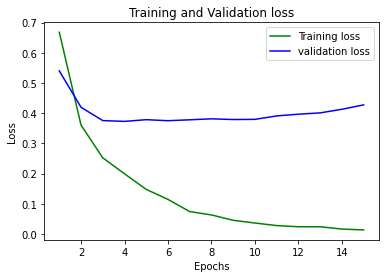

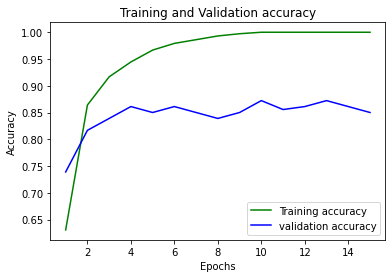

In [ ]:
#loss plot
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 
 
#accuracy plot
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



 # Train & Test image and text

Text

In [ ]:
# Bi-lstm
inputs_2 = Input(shape=(20,))
text_net_Bi_lstm_1=Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)(inputs_2)
text_net_Bi_lstm_1=Bidirectional(LSTM(10))(text_net_Bi_lstm_1)
text_net_Bi_lstm_1 = Dense(1000, activation='relu')(text_net_Bi_lstm_1)
text_net_Bi_lstm_1 = BatchNormalization()(text_net_Bi_lstm_1)
text_net_Bi_lstm_1 =Dense(1, activation='sigmoid')(text_net_Bi_lstm_1)

In [ ]:
#text train

final_text = Model(inputs=inputs_2, outputs=text_net_Bi_lstm_1,)
final_text.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = final_text.fit(X_train_Text, Y_train, batch_size=32, epochs=15,
                    validation_data=(X_val_Text, Y_val),
                     verbose = 1)

p888=final_text.evaluate(X_test_Text,Y_test)

Epoch 1/15
23/23 [==============================] - 5s 50ms/step - loss: 0.6646 - accuracy: 0.6230 - val_loss: 0.6840 - val_accuracy: 0.5611
Epoch 2/15
23/23 [==============================] - 0s 9ms/step - loss: 0.5270 - accuracy: 0.7778 - val_loss: 0.6728 - val_accuracy: 0.5611
Epoch 3/15
23/23 [==============================] - 0s 9ms/step - loss: 0.2781 - accuracy: 0.8860 - val_loss: 0.7085 - val_accuracy: 0.5611
Epoch 4/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0996 - accuracy: 0.9801 - val_loss: 0.6871 - val_accuracy: 0.5611
Epoch 5/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0499 - accuracy: 0.9881 - val_loss: 0.7901 - val_accuracy: 0.5611
Epoch 6/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.9927 - val_loss: 0.7276 - val_accuracy: 0.5611
Epoch 7/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9896 - val_loss: 0.7937 - val_accuracy: 0.5611
Epoch 8/15
23/23 [=

In [ ]:
input_3 = Input(shape=(20,))
text_net_Bi_gru_1=Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)(input_3)
text_net_Bi_gru_1=GRU(10)(text_net_Bi_gru_1)
text_net_Bi_gru_1 = Dense(1000, activation='relu')(text_net_Bi_gru_1)
text_net_Bi_gru=BatchNormalization()(text_net_Bi_gru)
text_net_Bi_gru_1= Dense(1,activation='sigmoid')(text_net_Bi_gru_1)

In [ ]:
final_text = Model(inputs=input_3, outputs=text_net_Bi_gru_1,)
final_text.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = final_text.fit(X_train_Text, Y_train, batch_size=32, epochs=15,
                    validation_data=(X_val_Text, Y_val),
                     verbose = 1)

p888=final_text.evaluate(X_test_Text,Y_test)

Epoch 1/15
23/23 [==============================] - 3s 26ms/step - loss: 0.6910 - accuracy: 0.5353 - val_loss: 0.6851 - val_accuracy: 0.5611
Epoch 2/15
23/23 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5673 - val_loss: 0.6810 - val_accuracy: 0.5611
Epoch 3/15
23/23 [==============================] - 0s 6ms/step - loss: 0.6711 - accuracy: 0.5642 - val_loss: 0.6730 - val_accuracy: 0.5611
Epoch 4/15
23/23 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.5823 - val_loss: 0.6830 - val_accuracy: 0.5833
Epoch 5/15
23/23 [==============================] - 0s 6ms/step - loss: 0.5727 - accuracy: 0.6507 - val_loss: 0.6712 - val_accuracy: 0.6278
Epoch 6/15
23/23 [==============================] - 0s 5ms/step - loss: 0.4367 - accuracy: 0.7954 - val_loss: 0.7528 - val_accuracy: 0.6611
Epoch 7/15
23/23 [==============================] - 0s 6ms/step - loss: 0.2551 - accuracy: 0.9009 - val_loss: 0.8265 - val_accuracy: 0.6833
Epoch 8/15
23/23 [=

image

In [ ]:
vgg16 = VGG16(weights='imagenet')
fc2 = vgg16.get_layer('fc2').output
Prediction = Dense(1000, activation='relu')(fc2)
Prediction = BatchNormalization()(Prediction)
Prediction_1 = Dense(1, activation='sigmoid')(Prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
23/23 [==============================] - 13s 499ms/step - loss: 0.8724 - accuracy: 0.5030 - val_loss: 0.7846 - val_accuracy: 0.6056
Epoch 2/15
23/23 [==============================] - 11s 484ms/step - loss: 0.4927 - accuracy: 0.7690 - val_loss: 0.6803 - val_accuracy: 0.6722
Epoch 3/15
23/23 [==============================] - 11s 496ms/step - loss: 0.3083 - accuracy: 0.9111 - val_loss: 0.6249 - val_accuracy: 0.7056
Epoch 4/15
23/23 [==============================] - 11s 484ms/step - loss: 0.2238 - accuracy: 0.9559 - val_loss: 0.5908 - val_accuracy: 0.7389
Epoch 5/15
23/23 [==============================] - 11s 475ms/step - loss: 0.1981 - accuracy: 0.9625 - val_loss: 0.5651 - val_accuracy: 0.7556
Epoch 6/15
23/23 [==============================] - 11s 472ms/step - loss: 0.1599 - accuracy: 0.9767 - val_loss: 0.5478 - val_accuracy: 0.7667
Epoch 7/15
23/23 [==============================] - 11s 469ms/step - loss: 0.1309 - accuracy: 0.9886 - val_loss: 0.5356 - val_accuracy: 0.7778

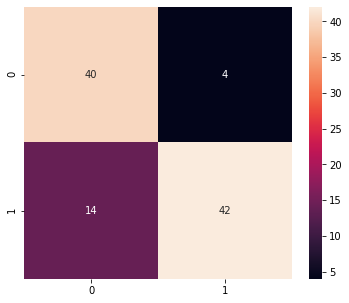

In [ ]:
#image train
 
model_2 = Model(inputs=vgg16.input, outputs=Prediction_1)
adam = Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
model_2.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])
history1 = model_2.fit(X_train_image, Y_train, batch_size=32, epochs=15,
                    validation_data=(X_val_image, Y_val),
                     verbose = 1)
 
p77=model_2.predict(X_test_image)
Y_pred_image_3cnn = []
for p999 in p77:
  if p999 > 0.5:
    Y_pred_image_3cnn.append(1)
  else:
    Y_pred_image_3cnn.append(0)
 
class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred_image_3cnn, target_names = class_names))
cm = confusion_matrix(Y_test, Y_pred_image_3cnn)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

In [ ]:
#2CNN
imaux_2=Input(shape=(img_rows, img_cols,3,))
image_net_2cnn=Convolution2D(64, nb_conv, nb_conv,activation='relu')(imaux_2)
image_net_2cnn=Convolution2D(32, nb_conv, nb_conv,activation='relu')(image_net_2cnn)
image_net_2cnn=MaxPooling2D(pool_size=(2, 2))(image_net_2cnn)
image_net_2cnn=Dropout(0.5)(image_net_2cnn)
image_net_2cnn=Flatten()(image_net_2cnn)
image_net_2cnn=Dense(1000,activation='relu')(image_net_2cnn)
image_net_2cnn=BatchNormalization()(image_net_2cnn)
image_net_2cnn=Dropout(0.2)(image_net_2cnn)
image_net_2cnn=Dense(1,activation='sigmoid')(image_net_2cnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
23/23 [==============================] - 2s 42ms/step - loss: 0.8728 - accuracy: 0.6420 - val_loss: 3.2930 - val_accuracy: 0.5944
Epoch 2/15
23/23 [==============================] - 0s 19ms/step - loss: 0.7155 - accuracy: 0.7732 - val_loss: 0.8071 - val_accuracy: 0.7333
Epoch 3/15
23/23 [==============================] - 0s 19ms/step - loss: 0.5595 - accuracy: 0.7612 - val_loss: 1.2629 - val_accuracy: 0.6333
Epoch 4/15
23/23 [==============================] - 0s 20ms/step - loss: 0.5509 - accuracy: 0.7734 - val_loss: 0.6140 - val_accuracy: 0.7778
Epoch 5/15
23/23 [==============================] - 0s 19ms/step - loss: 0.4513 - accuracy: 0.8221 - val_loss: 1.3327 - val_accuracy: 0.6000
Epoch 6/15
23/23 [==============================] - 0s 19ms/step - loss: 0.4332 - accuracy: 0.7942 - val_loss: 0.6343 - val_accuracy: 0.7444
Epoch 7/15
23/23 [==============================] - 0s 19ms/step - loss: 0.4591 - accuracy: 0.7894 - val_loss: 0.6174 - val_accuracy: 0.7333
Epoch 8/15
23

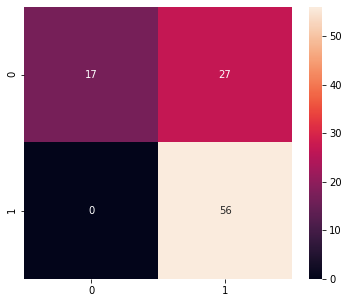

In [ ]:
model_2 = Model(inputs=imaux_2, outputs=image_net_2cnn)
adam = Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
model_2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history1 = model_2.fit(X_train_image, Y_train, batch_size=32, epochs=15,
                    validation_data=(X_val_image, Y_val),
                     verbose = 1)
 
p77=model_2.predict(X_test_image)
Y_pred_image_3cnn = []
for p999 in p77:
  if p999 > 0.5:
    Y_pred_image_3cnn.append(1)
  else:
    Y_pred_image_3cnn.append(0)
 
class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred_image_3cnn, target_names = class_names))
cm = confusion_matrix(Y_test, Y_pred_image_3cnn)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

# Traditional ML

In [ ]:
#svm

#Multimodal
X_train_image_1 = X_train_image.reshape(720,224*224*3)
X_test_image_1 = X_test_image.reshape(100,224*224*3)
image_text_train = np.concatenate((X_train_Text,X_train_image_1), axis=1)
image_text_test = np.concatenate((X_test_Text,X_test_image_1), axis=1)
svm = SVC(kernel='rbf')
svm.fit(image_text_train,Y_train)
y_pred = svm.predict(image_text_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Multimodal Accu: ', accuracy)



Multimodal Accu:  0.66


              precision    recall  f1-score   support

    Negative       0.60      0.27      0.37        44
    Positive       0.60      0.86      0.71        56

    accuracy                           0.60       100
   macro avg       0.60      0.56      0.54       100
weighted avg       0.60      0.60      0.56       100



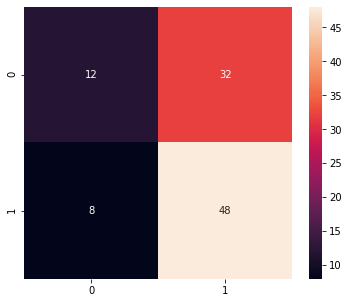

In [ ]:
#svm_Text
model = SVC(kernel='rbf')
model.fit(X_train_Text,Y_train)
Y_pred = model.predict(X_test_Text)

class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred, target_names = class_names))
cm = confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

              precision    recall  f1-score   support

    Negative       0.63      0.55      0.59        44
    Positive       0.68      0.75      0.71        56

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.66      0.66       100



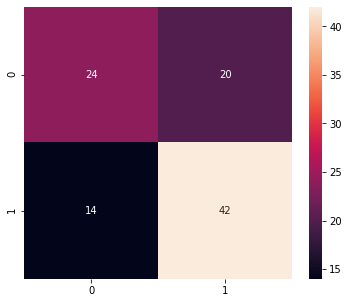

In [ ]:
#svm_Image
X_train_image_1 = X_train_image.reshape(720,224*224*3)
X_test_image_1 = X_test_image.reshape(100,224*224*3)
model = SVC(kernel='rbf')
model.fit(X_train_image_1,Y_train)
Y_pred = model.predict(X_test_image_1)

class_names = ['Negative', 'Positive']
print(classification_report(Y_test, Y_pred, target_names = class_names))
cm = confusion_matrix(Y_test,Y_pred)
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True)

In [ ]:
#RF

#Multimodal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
X_train_image_1 = X_train_image.reshape(720,224*224*3)
X_test_image_1 = X_test_image.reshape(100,224*224*3)
image_text_train = np.concatenate((X_train_Text,X_train_image_1), axis=1)
image_text_test = np.concatenate((X_test_Text,X_test_image_1), axis=1)
classifier = RandomForestClassifier()
classifier.fit(image_text_train, Y_train)
y_pred = classifier.predict(image_text_test)
print("Multimodal: ",classification_report(Y_test, y_pred))
#Text
classifier = RandomForestClassifier()
classifier.fit(X_train_Text, Y_train)
y_pred = classifier.predict(X_test_Text)
print("Text: ",classification_report(Y_test, y_pred))
#Image
classifier = RandomForestClassifier()
classifier.fit(X_train_image_1, Y_train)
y_pred = classifier.predict(X_test_image_1)
print("Image: ",classification_report(Y_test, y_pred))

Multimodal:                precision    recall  f1-score   support

           0       0.67      0.64      0.65        44
           1       0.72      0.75      0.74        56

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.70      0.70       100

Text:                precision    recall  f1-score   support

           0       0.51      0.41      0.46        44
           1       0.60      0.70      0.64        56

    accuracy                           0.57       100
   macro avg       0.56      0.55      0.55       100
weighted avg       0.56      0.57      0.56       100

Image:                precision    recall  f1-score   support

           0       0.65      0.55      0.59        44
           1       0.68      0.77      0.72        56

    accuracy                           0.67       100
   macro avg       0.67      0.66      0.66       100
weighted avg       0.67      0.67      0.67   

In [ ]:
#DT
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Multimodal
X_train_image_1 = X_train_image.reshape(720,224*224*3)
X_test_image_1 = X_test_image.reshape(100,224*224*3)
image_text_train = np.concatenate((X_train_Text,X_train_image_1), axis=1)
image_text_test = np.concatenate((X_test_Text,X_test_image_1), axis=1)
classifier = DecisionTreeClassifier()
classifier.fit(image_text_train, Y_train)
y_pred = classifier.predict(image_text_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Multimodal: ",classification_report(Y_test, y_pred))

#Text
classifier = DecisionTreeClassifier()
classifier.fit(X_train_Text, Y_train)
y_pred = classifier.predict(X_test_Text)
from sklearn.metrics import classification_report, confusion_matrix
print("Text: ",classification_report(Y_test, y_pred))

#Image
classifier = DecisionTreeClassifier()
classifier.fit(X_train_image_1, Y_train)
y_pred = classifier.predict(X_test_image_1)
from sklearn.metrics import classification_report, confusion_matrix
print("Image: ",classification_report(Y_test, y_pred))

Multimodal:                precision    recall  f1-score   support

           0       0.51      0.64      0.57        44
           1       0.64      0.52      0.57        56

    accuracy                           0.57       100
   macro avg       0.58      0.58      0.57       100
weighted avg       0.58      0.57      0.57       100

Text:                precision    recall  f1-score   support

           0       0.47      0.39      0.42        44
           1       0.58      0.66      0.62        56

    accuracy                           0.54       100
   macro avg       0.53      0.52      0.52       100
weighted avg       0.53      0.54      0.53       100

Image:                precision    recall  f1-score   support

           0       0.57      0.61      0.59        44
           1       0.68      0.64      0.66        56

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63   

In [ ]:
#NB

#Multimodal
X_train_image_1 = X_train_image.reshape(720,224*224*3)
X_test_image_1 = X_test_image.reshape(100,224*224*3)
image_text_train = np.concatenate((X_train_Text,X_train_image_1), axis=1)
image_text_test = np.concatenate((X_test_Text,X_test_image_1), axis=1)
model = GaussianNB()
model.fit(image_text_train, Y_train)
predicted = model.predict(image_text_test)
print("Multimodal: ",classification_report(Y_test, predicted))

#Text
model = GaussianNB()
model.fit(X_train_Text, Y_train)
predicted = model.predict(X_test_Text)
print("Text: ",classification_report(Y_test, predicted))

#Image

model = GaussianNB()
model.fit(X_train_image_1, Y_train)
predicted = model.predict(X_test_image_1)
print("Image: ",classification_report(Y_test, predicted))

Multimodal:                precision    recall  f1-score   support

           0       0.55      0.66      0.60        44
           1       0.68      0.57      0.62        56

    accuracy                           0.61       100
   macro avg       0.61      0.62      0.61       100
weighted avg       0.62      0.61      0.61       100

Text:                precision    recall  f1-score   support

           0       0.48      0.68      0.56        44
           1       0.62      0.41      0.49        56

    accuracy                           0.53       100
   macro avg       0.55      0.55      0.53       100
weighted avg       0.56      0.53      0.52       100

Image:                precision    recall  f1-score   support

           0       0.55      0.66      0.60        44
           1       0.68      0.57      0.62        56

    accuracy                           0.61       100
   macro avg       0.61      0.62      0.61       100
weighted avg       0.62      0.61      0.61   